TRABALHO TCC - BI MASTER - PUC
Hugo Torraca

metodo para classificar possiveis dados de precipitação estimada de satelite inconsistentes

classficadores analisados:

KNN -> Kneighbors

GNB -> Naive Bayes

RFC -> Random Forest

DTC -> Decision Tree

SVM -> Suport Vector Machine

LRE -> Regressao Logistica

BGT -> Bagging Decision Tree

BDT -> Boosting Decision Tree

XGB -> XGBoost

LGB -> LightGBM

RNN - > Rede Neural

In [1]:
import pandas as pd 
import numpy as np
import random
from sklearn.manifold import TSNE
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler() 

In [2]:
data = pd.read_csv("dados_2.csv",sep=";")
data=pd.get_dummies(data, columns = ['Estacao'])

divindo o data frame em treino e teste


In [3]:
dados=list()
random.seed(211100143)
num_ale=np.random.randint(1000000,99999999,size=(1,50))
for x in range(50):
    train, test = train_test_split(data, test_size=0.2,stratify=data["Incosistente"],random_state=num_ale[0,x])

    X_train =train.drop(columns=["Incosistente"])
    X_test =test.drop(columns=["Incosistente"])
    Y_train= train["Incosistente"]
    Y_test=test["Incosistente"]  
    
    dados.append(X_train)
    dados.append(Y_train)
    dados.append(X_test)
    dados.append(Y_test)
resultados=pd.DataFrame(columns = ['modelo', 'rodada', 'prob','verdadeiro negativo','falso negativo',"falso positivo","verdadeiro positivo"])

1- Kneighbors

In [4]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    KNN.fit(X_train_scaled, Y_train)
    prob= KNN.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['KNN',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

2- Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    NB = gnb.fit(X_train_scaled, Y_train)
    prob= gnb.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['GNB',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

3 - random Forest


In [6]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=30, max_depth=20)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    RFC = clf.fit(X_train_scaled, Y_train)
    prob= RFC.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['RFC',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

4- decision TREE

In [7]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    DTC = DT.fit(X_train_scaled, Y_train)
    prob= DTC.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['DTC',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

5- SVM

In [8]:
from sklearn.svm import LinearSVC
SVC = LinearSVC(max_iter=10000)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    LSVC = SVC.fit(X_train_scaled, Y_train)
    prob= LSVC._predict_proba_lr(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['SVM',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])


6- Regressão logistica 

In [9]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    LRE = LR.fit(X_train_scaled, Y_train)
    prob= LRE.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['LRE',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

7- Bagging Decision Tree


In [10]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,n_estimators=50)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    BGC = bg.fit(X_train_scaled, Y_train)
    prob= BGC.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['BGT',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

8- Boosting Decision Tree

In [11]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    BDT = adb.fit(X_train_scaled, Y_train)
    prob= BDT.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['BDT',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

9- XGBOOST

In [12]:
from xgboost import XGBClassifier
XB = XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=650)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    XGB = XB.fit(X_train_scaled, Y_train)
    prob= XGB.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['XGB',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])


10-LightGBM

In [13]:
import lightgbm as LGBM
lg= LGBM.LGBMClassifier(learning_rate=0.01,n_estimators=5000,objective='binary',metric='auc',is_unbalance=True)
for x in range(50):
    X_train_scaled = sc.fit_transform(dados[0+x*4])
    X_test_scaled= sc.transform(dados[2+x*4])
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]
    LGB = lg.fit(X_train_scaled, Y_train)
    prob= LGB.predict_proba(X_test_scaled)
    for y in range(51,0,-1):
        a=prob[:,1]>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['LGB',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

11- Rede Neural

In [14]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras.layers import Input, Dense,Dropout
from keras.models import Model, Sequential
from keras import regularizers
for x in range(50):      
    X_train = dados[0+x*4]
    X_test= dados[2+x*4]
    Y_train=dados[1+x*4]
    Y_test=dados[3+x*4]    
    
    data2= X_train
    data2["Incosistente"]=Y_train
    p_train, valid = train_test_split(data2, test_size=0.2,stratify=data2["Incosistente"])
    
    X_ptrain =sc.fit_transform(p_train.drop(columns=["Incosistente"]))
    X_valid =sc.transform(valid.drop(columns=["Incosistente"]))
    X_test_scaled= sc.transform(X_test)

    Y_ptrain= p_train["Incosistente"]
    Y_valid=valid["Incosistente"]
    
    RN=models.Sequential()
    RN.add(layers.Dense(11,activation='relu',input_shape=(11,)))
    RN.add(layers.Dense(7,activation='relu'))
    RN.add(Dropout(0.2))
    RN.add(layers.Dense(5,activation='relu'))
    RN.add(Dropout(0.2))
    RN.add(layers.Dense(3,activation='relu'))
    RN.add(layers.Dense(1,activation='sigmoid'))
    RN.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['AUC'])
    RNN=RN.fit(X_ptrain,Y_ptrain,epochs=80,batch_size=256,validation_data=(X_valid,Y_valid),verbose=0)
    
    prob=RN.predict(X_test_scaled)
    for y in range(51,0,-1):
        a=prob>=y/100
        cm=confusion_matrix(Y_test,a)
        resultados.loc[len(resultados)]=(['RNN',len(resultados)+1,y/100,cm[0,0],cm[1,0],cm[0,1],cm[1,1]])

437/437 [==============================] - 1s 3ms/step


In [15]:
resultados["Recall"]=resultados["verdadeiro positivo"]/(resultados["verdadeiro positivo"]+resultados["falso negativo"])
resultados["Precision"]=resultados["verdadeiro positivo"]/(resultados["verdadeiro positivo"]+resultados["falso positivo"])
resultados["F1"]=2*(resultados["Precision"]*resultados["Recall"])/(resultados["Precision"]+resultados["Recall"])

In [16]:
resultados.to_pickle("resultados1.pkl")

<AxesSubplot: xlabel='prob', ylabel='Recall'>

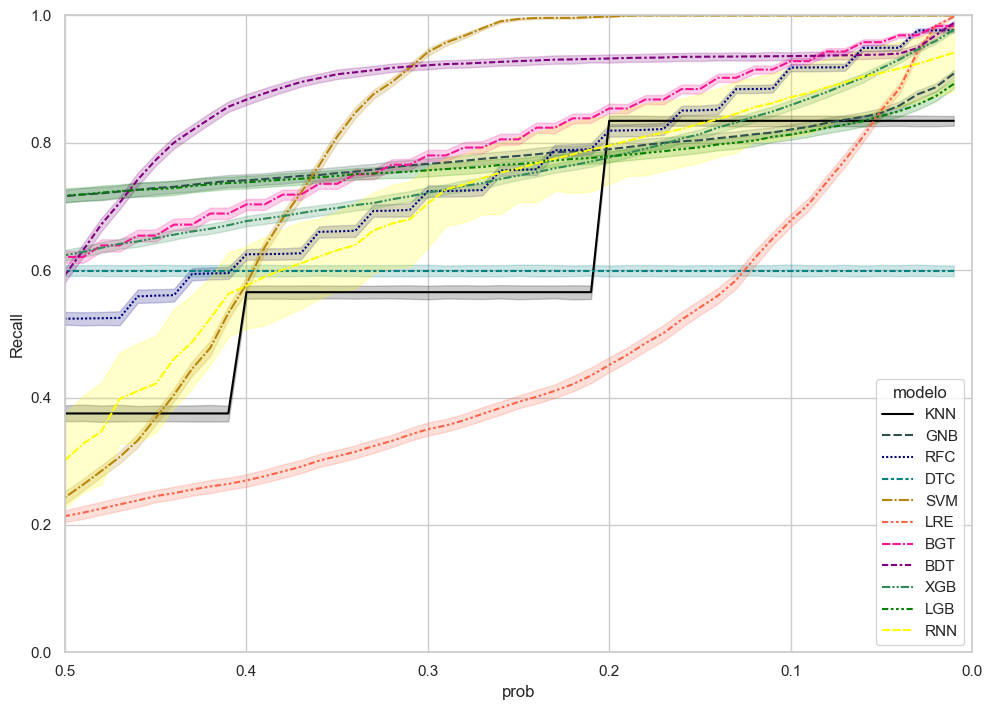

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax=sns.lineplot(data=resultados, x="prob", y="Recall", hue="modelo",
                palette=['black','darkslategrey','navy','teal','darkgoldenrod','tomato','deeppink','purple','seagreen','green','yellow'],
                style='modelo')
ax.invert_xaxis()
ax.set_xlim(0.5,0)
ax.set_ylim(0,1)
ax

In [18]:
resultados_st=resultados[(resultados["modelo"]=="SVM")|(resultados["modelo"]=="RFC")|(resultados["modelo"]=="LRE")|(resultados["modelo"]=="BGT")|(resultados["modelo"]=="XGB")|(resultados["modelo"]=="RNN")]

<AxesSubplot: xlabel='prob', ylabel='Recall'>

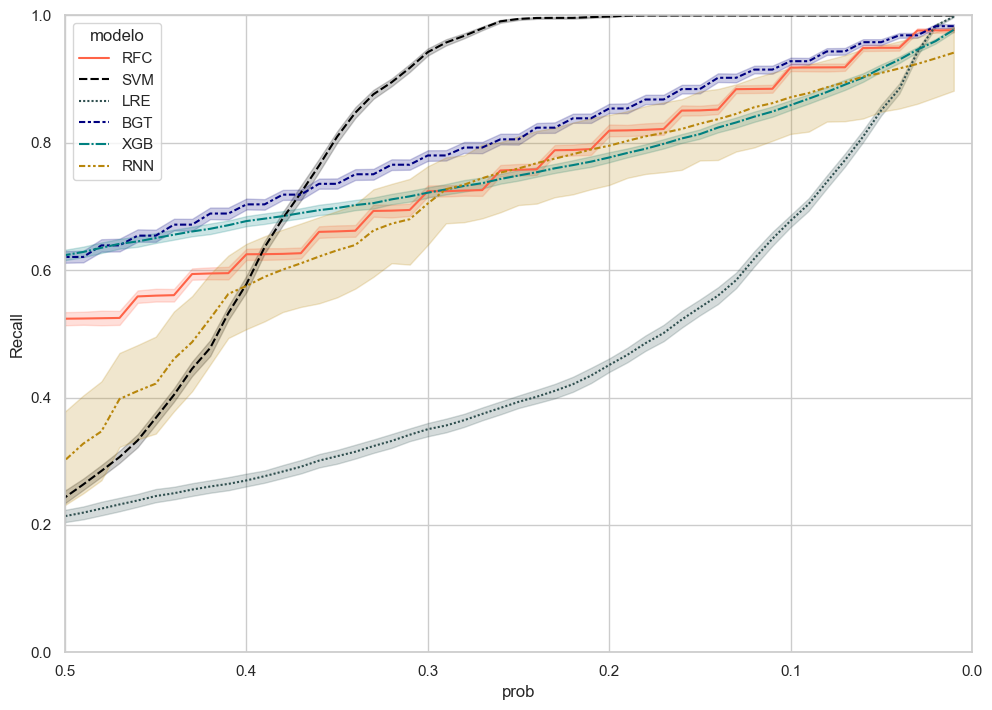

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax2=sns.lineplot(data=resultados_st, x="prob", y="Recall", hue="modelo",
                palette=['tomato','black','darkslategrey','navy','teal','darkgoldenrod'],
                style='modelo')
ax2.invert_xaxis()
ax2.set_xlim(0.5,0)
ax2.set_ylim(0,1)
ax2

<AxesSubplot: xlabel='prob', ylabel='Precision'>

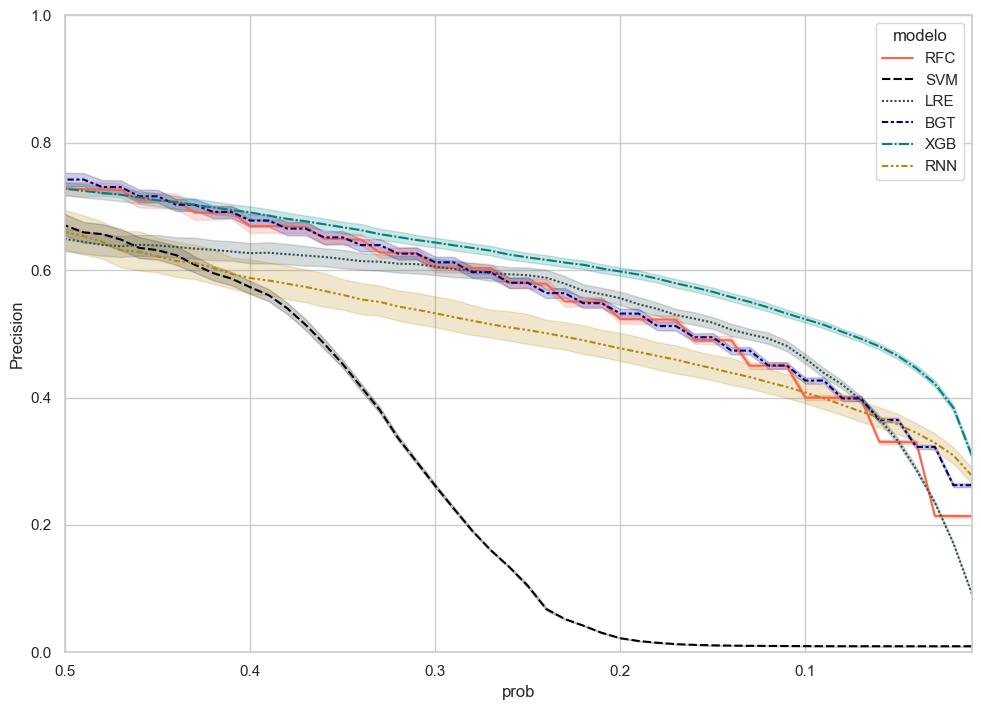

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
ax3=sns.lineplot(data=resultados_st, x="prob", y="Precision", hue="modelo",
                palette=['tomato','black','darkslategrey','navy','teal','darkgoldenrod'],
                style='modelo')
ax3.invert_xaxis()
ax3.set_xlim(0.5,0.01)
ax3.set_ylim(0,1)
ax3